In [14]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os 
os.environ["DCBENCH_CONFIG"] = "/home/sabri/code/dcbench/dcbench-config.yaml"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


![alt text](https://datacentricai.cc/images/logos/slicediscovery_hu6687ef99f16931b2f0d65c72bfc1ddad_90737_250x250_fit_box_2.png "Slice Discovery Logo")

# `dcbench`: Slice Discovery Demo

This notebook showcases the interface for Slice Discovery in `dcbench`. You can read more about the task in our [documentation](https://dcbench.readthedocs.io/en/latest/tasks.html#slice-discovery) and on our [website](https://www.datacentricai.cc/benchmark/).

Let's start off by importing `dcbench` and listing the supported tasks.

In [15]:
import dcbench
dcbench.tasks

,name,summary
minidata,Minimal Data Selection,"Given a large training dataset, what is the sm..."
slice_discovery,Slice Discovery,Machine learnings models that achieve high ove...
budgetclean,Data Cleaning on a Budget,"When it comes to data preparation, data cleani..."


In [16]:
slice_discovery = dcbench.tasks["slice_discovery"]

In [17]:
slice_discovery.problems

,alpha,dataset,n_pred_slices,slice_category,slice_names,target_name
p_117306,0.0171,imagenet,5,rare,[craft.n.02],vehicle.n.01
p_117341,0.0171,imagenet,5,rare,[cart.n.01],vehicle.n.01
p_117406,0.0171,imagenet,5,rare,[rocket.n.01],vehicle.n.01
p_117634,0.0171,imagenet,5,rare,[barrow.n.03],vehicle.n.01
p_117980,0.0171,imagenet,5,rare,[bicycle.n.01],vehicle.n.01
p_118007,0.0171,imagenet,5,rare,[wagon.n.01],vehicle.n.01
p_118045,0.0171,imagenet,5,rare,[motorcycle.n.01],vehicle.n.01
p_118259,0.0171,imagenet,5,rare,[hat.n.01],clothing.n.01
p_118311,0.0171,imagenet,5,rare,[shirt.n.01],clothing.n.01
p_118660,0.0171,imagenet,5,rare,[menu.n.02],food.n.01


In [18]:
problem = slice_discovery.problems["p_118919"]
problem.artifacts

{'activations': <dcbench.common.artifact.DataPanelArtifact at 0x7f9b55e837f0>,
 'base_dataset': <dcbench.common.artifact.VisionDatasetArtifact at 0x7f9b55e78a60>,
 'clip': <dcbench.common.artifact.DataPanelArtifact at 0x7f9b55e78a90>,
 'model': <dcbench.common.artifact.ModelArtifact at 0x7f9b55e83880>,
 'test_predictions': <dcbench.common.artifact.DataPanelArtifact at 0x7f9b55e838e0>,
 'test_slices': <dcbench.common.artifact.DataPanelArtifact at 0x7f9b55e83940>,
 'val_predictions': <dcbench.common.artifact.DataPanelArtifact at 0x7f9b55e839a0>}

,id (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn),synset (PandasSeriesColumn)
0,n01440764_10026,,"tench, Tinca tinca",n01440764
1,n01440764_10027,,"tench, Tinca tinca",n01440764
2,n01440764_10029,,"tench, Tinca tinca",n01440764
3,n01440764_10040,,"tench, Tinca tinca",n01440764
4,n01440764_10042,,"tench, Tinca tinca",n01440764
...,...,...,...,...
1331162,ILSVRC2012_val_00005961,,fountain,n03388043
1331163,ILSVRC2012_val_00008801,,"confectionery, confectionary, candy store",n03089624
1331164,ILSVRC2012_val_00008176,,"ostrich, Struthio camelus",n01518878
1331165,ILSVRC2012_val_00004764,,"paddlewheel, paddle wheel",n03874293

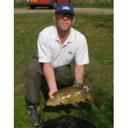
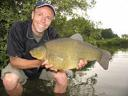
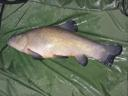
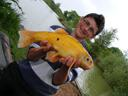
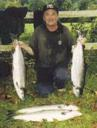
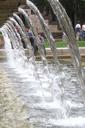
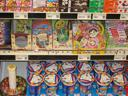
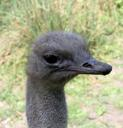
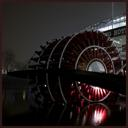
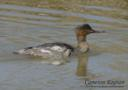

In [19]:
problem["base_dataset"]

In [20]:
problem["model"]

VisionClassifier(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [36]:
from dcbench.tasks.slice_discovery import confusion_sdm, domino_sdm

In [37]:
solution = confusion_sdm(problem)

In [40]:
solution.artifacts["pred_slices"].load()

,id (PandasSeriesColumn),pred_slices (NumpyArrayColumn),index (PandasSeriesColumn)
0,n07930864_30487,"np.ndarray(shape=(5,))",0
1,n07871810_6660,"np.ndarray(shape=(5,))",1
2,n02268443_42031,"np.ndarray(shape=(5,))",2
3,n07614500_26503,"np.ndarray(shape=(5,))",3
4,n07614500_60293,"np.ndarray(shape=(5,))",4
...,...,...,...
6024,n02701002_16927,"np.ndarray(shape=(5,))",6024
6025,n04192698_12196,"np.ndarray(shape=(5,))",6025
6026,n07920052_15852,"np.ndarray(shape=(5,))",6026
6027,n01990800_3090,"np.ndarray(shape=(5,))",6027


In [41]:
problem.evaluate(solution)

{'precision_at_10': 0.3, 'precision_at_25': 0.4, 'auroc': 0.9485750209555742}

In [42]:
np.random.seed(128)

solution = domino_sdm(problem)

 42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                                                                                         | 42/100 [00:02<00:02, 19.89it/s]


In [43]:
problem.evaluate(solution)

{'precision_at_10': 1.0, 'precision_at_25': 1.0, 'auroc': 0.9979725481978207}

,id (PandasSeriesColumn),pred_slices (NumpyArrayColumn),index (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn),synset (PandasSeriesColumn)
0,n07802026_1659,"np.ndarray(shape=(5,))",2573,,hay,n07802026
1,n07802026_11942,"np.ndarray(shape=(5,))",2488,,hay,n07802026
2,n07802026_12444,"np.ndarray(shape=(5,))",1592,,hay,n07802026
3,n07802026_13818,"np.ndarray(shape=(5,))",2670,,hay,n07802026
4,n07802026_5992,"np.ndarray(shape=(5,))",3105,,hay,n07802026
5,n07802026_15748,"np.ndarray(shape=(5,))",2464,,hay,n07802026
6,n07802026_63822,"np.ndarray(shape=(5,))",2460,,hay,n07802026
7,n07802026_2233,"np.ndarray(shape=(5,))",3370,,hay,n07802026
8,n07802026_18815,"np.ndarray(shape=(5,))",1365,,hay,n07802026
9,n07802026_20956,"np.ndarray(shape=(5,))",5891,,hay,n07802026

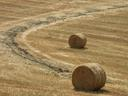
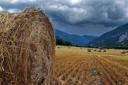
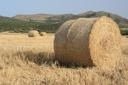
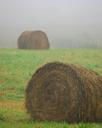
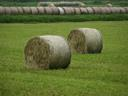
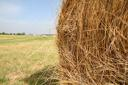
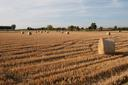
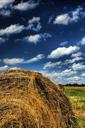
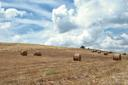
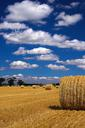

In [44]:
import meerkat as mk
dp = mk.merge(solution["pred_slices"], problem["base_dataset"], on="id")
dp.lz[(-dp["pred_slices"][:,4]).argsort()[:10]]